In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_solo1000 = pd.read_csv('df_solo1000.csv') #In a previous notebook, I divided the datasets into solo, duo, and squad mode, and downlaoded them as csv files.
df_duo1000 = pd.read_csv('df_duo1000.csv')
df_squad1000 = pd.read_csv('df_squad1000.csv')

## 1. Are there variables that are particularly significant in terms of explaining the answer to your project question?

The underlying questions for my project are what variables positively correlate with winning a match Players Unknown Battleground. Winning in this game means being the last player / team standing. To increase threshold of victory we can consider it to be within the top 5 team placement. 

In my previous visualizations I've found that a player doing more damage and getting more kills is the strongest variable correlating with winning a match



## 2. Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

My mentor has told me that Pearson Correlation values above .4 or below -.4 are to be considered significant, anything in between those values are too close to 0, are thuoght to be weak correlations.

When examining the correlations below, its important to remember when looking at the team placement variable that a negative correlation is a good thing, since the lower the team placement number translates into closer to victory (first place).

Some noteworthy strong correlations are the following (rough estimates based off of all three samples): 

1. Damage & Distance walked: .4   (independent)
2. Distance walked & team placement: -.8   (dependent)
3. Distance driven & team placement: -.5   (dependent)
4. Distance driven & survival time: .6   (dependent)
5. Player Kills & team placement : -.4   (independent)

I say player kills and team placement are independent because at the end of the day to win a match you dont have to get any kills or you may likely need only one kill. I don't believe these variables are strongly dependent on eachother. 

In [6]:
df_solo1000.corr() #

,Unnamed: 0,player_dist_walk,player_dmg,team_placement,player_dist_ride,player_survive_time,game_size,party_size,player_kills,player_survival_time
Unnamed: 0,1.000000,0.011045,-0.000711,-0.022270,-0.067102,-0.029959,-0.125883,NaN,-0.002046,-0.029959
player_dist_walk,0.011045,1.000000,0.413271,-0.817623,0.344811,0.840729,-0.090729,NaN,0.426838,0.840729
player_dmg,-0.000711,0.413271,1.000000,-0.442053,0.248756,0.471769,0.002189,NaN,0.954413,0.471769
team_placement,-0.022270,-0.817623,-0.442053,1.000000,-0.546845,-0.933691,0.196261,NaN,-0.448011,-0.933691
player_dist_ride,-0.067102,0.344811,0.248756,-0.546845,1.000000,0.579454,0.053378,NaN,0.240997,0.579454
player_survive_time,-0.029959,0.840729,0.471769,-0.933691,0.579454,1.000000,-0.085071,NaN,0.478909,1.000000
game_size,-0.125883,-0.090729,0.002189,0.196261,0.053378,-0.085071,1.000000,NaN,0.012207,-0.085071
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,-0.002046,0.426838,0.954413,-0.448011,0.240997,0.478909,0.012207,NaN,1.000000,0.478909
player_survival_time,-0.029959,0.840729,0.471769,-0.933691,0.579454,1.000000,-0.085071,NaN,0.478909,1.000000


In [7]:
df_duo1000.corr()

,Unnamed: 0,player_dist_walk,player_dmg,team_placement,player_dist_ride,player_survive_time,game_size,party_size,player_kills,player_survival_time
Unnamed: 0,1.000000,-0.048243,0.025231,0.097562,0.008661,-0.061014,0.605448,NaN,0.011719,-0.061014
player_dist_walk,-0.048243,1.000000,0.404584,-0.805150,0.434862,0.860413,-0.092509,NaN,0.397076,0.860413
player_dmg,0.025231,0.404584,1.000000,-0.416096,0.267078,0.469705,0.021493,NaN,0.855378,0.469705
team_placement,0.097562,-0.805150,-0.416096,1.000000,-0.579428,-0.902078,0.158549,NaN,-0.412291,-0.902078
player_dist_ride,0.008661,0.434862,0.267078,-0.579428,1.000000,0.641795,0.034268,NaN,0.237580,0.641795
player_survive_time,-0.061014,0.860413,0.469705,-0.902078,0.641795,1.000000,-0.088631,NaN,0.453633,1.000000
game_size,0.605448,-0.092509,0.021493,0.158549,0.034268,-0.088631,1.000000,NaN,-0.005802,-0.088631
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,0.011719,0.397076,0.855378,-0.412291,0.237580,0.453633,-0.005802,NaN,1.000000,0.453633
player_survival_time,-0.061014,0.860413,0.469705,-0.902078,0.641795,1.000000,-0.088631,NaN,0.453633,1.000000


In [8]:
df_squad1000.corr()

,Unnamed: 0,player_dist_walk,player_dmg,team_placement,player_dist_ride,player_survive_time,game_size,party_size,player_kills,player_survival_time
Unnamed: 0,1.000000,-0.017143,0.001104,0.048667,0.104630,0.016135,0.771276,NaN,-0.003268,0.016135
player_dist_walk,-0.017143,1.000000,0.282326,-0.705502,0.451689,0.866790,0.016720,NaN,0.243334,0.866790
player_dmg,0.001104,0.282326,1.000000,-0.270949,0.215233,0.330722,-0.006746,NaN,0.917231,0.330722
team_placement,0.048667,-0.705502,-0.270949,1.000000,-0.490471,-0.805660,0.112334,NaN,-0.234746,-0.805660
player_dist_ride,0.104630,0.451689,0.215233,-0.490471,1.000000,0.636218,0.069512,NaN,0.177826,0.636218
player_survive_time,0.016135,0.866790,0.330722,-0.805660,0.636218,1.000000,0.030286,NaN,0.279621,1.000000
game_size,0.771276,0.016720,-0.006746,0.112334,0.069512,0.030286,1.000000,NaN,-0.006862,0.030286
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,-0.003268,0.243334,0.917231,-0.234746,0.177826,0.279621,-0.006862,NaN,1.000000,0.279621
player_survival_time,0.016135,0.866790,0.330722,-0.805660,0.636218,1.000000,0.030286,NaN,0.279621,1.000000


## 3. What are the most appropriate tests to use to analyse these relationships

We could apply a t test, and examine the p value to determine the liklihood of these results occuring again. a jointplot will help visualize some of these variables as well.

C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


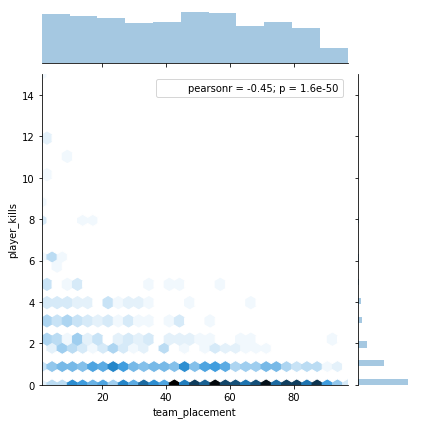

In [12]:
_ = sns.jointplot(x='team_placement', y='player_kills', data=df_solo1000, kind='hex') 

From our test we see the higher the kills are, the better the team placement (higher on the left side of the graph). The extremely low p value shows the liklihood of this being wrong as below 1.6 e-50 %, so near 0. 

In [14]:
stats.ttest_ind(df_solo1000.player_kills, df_solo1000.team_placement)  #The two variables are indefintely correlated

Ttest_indResult(statistic=-52.944154681903015, pvalue=0.0)

In [17]:
stats.ttest_ind(df_solo1000.player_dist_ride, df_solo1000.player_survive_time) 

#Using vehicles defintely increases a players survival time
#Many players avoid vehicles to avoid having attention brought to them, hoping this will keep them alive

Ttest_indResult(statistic=17.55768650275415, pvalue=2.718851850678828e-64)